In [2]:
#importing the libraries required
import pandas as pd
import numpy as np
from sklearn import datasets
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale =1.2)
from numpy import loadtxt
from xgboost import XGBClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
import xgboost
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix


In [3]:
#loading the data in our data frame
df = pd.read_excel("LoL Game Data inc. structures and monsters.xlsx")
df.describe()
df.shape

(19682, 27)

In [5]:
###CHECKING THE CORELATIONS
df.corr()

,tier_points,champion_level,champion_point,duration,win,kills,deaths,assists,gold_per_min,creeps_per_min,...,total_damage,true_champion_damage,total_champion_damage,wards_placed,wards_destroyed,structures_destroyed,monsters_killed,penta_kills,quadra_kills,unreal_kills
tier_points,1.000000,-0.026832,0.122313,-0.052128,0.038695,-0.021236,-0.087290,0.002414,0.015635,0.096592,...,0.006794,0.000511,0.000511,0.082940,0.163593,0.004300,0.002897,-0.000769,0.011862,-0.005664
champion_level,-0.026832,1.000000,-0.001590,0.647941,0.193339,0.551421,0.398786,0.520434,0.454073,0.212030,...,0.636894,0.331878,0.331878,0.066827,0.122940,0.371058,0.171947,0.043146,0.101464,0.000134
champion_point,0.122313,-0.001590,1.000000,0.029460,0.018903,-0.010362,-0.068543,-0.048029,-0.041483,0.071193,...,0.035267,0.016193,0.016193,0.071894,0.084508,0.036182,0.019790,-0.006281,-0.004668,-0.003552
duration,-0.052128,0.647941,0.029460,1.000000,-0.018773,0.207473,0.371313,0.222206,-0.243848,0.088666,...,0.615816,0.272442,0.272442,0.438140,0.367433,0.245800,0.193824,-0.023799,-0.024272,-0.014661
win,0.038695,0.193339,0.018903,-0.018773,1.000000,0.266116,-0.348749,0.264986,0.267186,0.115367,...,0.121518,0.065809,0.065809,0.019597,0.052029,0.408306,0.205369,0.051533,0.075356,0.010157
kills,-0.021236,0.551421,-0.010362,0.207473,0.266116,1.000000,0.169891,0.231386,0.687593,0.241584,...,0.492621,0.390048,0.390048,-0.139386,-0.033869,0.388247,0.186189,0.232195,0.367062,0.089591
deaths,-0.087290,0.398786,-0.068543,0.371313,-0.348749,0.169891,1.000000,0.307487,0.128713,-0.251130,...,0.126798,0.190859,0.190859,0.024924,-0.041970,-0.096854,-0.107505,-0.010135,0.017631,-0.010214
assists,0.002414,0.520434,-0.048029,0.222206,0.264986,0.231386,0.307487,1.000000,0.373247,-0.375811,...,0.026331,0.126638,0.126638,0.140714,0.101006,0.077176,0.006770,-0.009384,0.023789,-0.010093
gold_per_min,0.015635,0.454073,-0.041483,-0.243848,0.267186,0.687593,0.128713,0.373247,1.000000,0.193268,...,0.212332,0.203512,0.203512,-0.357191,-0.204581,0.285140,0.044927,0.157822,0.262062,0.066921
creeps_per_min,0.096592,0.212030,0.071193,0.088666,0.115367,0.241584,-0.251130,-0.375811,0.193268,1.000000,...,0.647879,0.111736,0.111736,-0.266847,-0.009927,0.345776,0.243556,0.041851,0.055263,0.018537


2021-03-24 11:56:57,278 - INFO     - NumExpr defaulting to 8 threads.


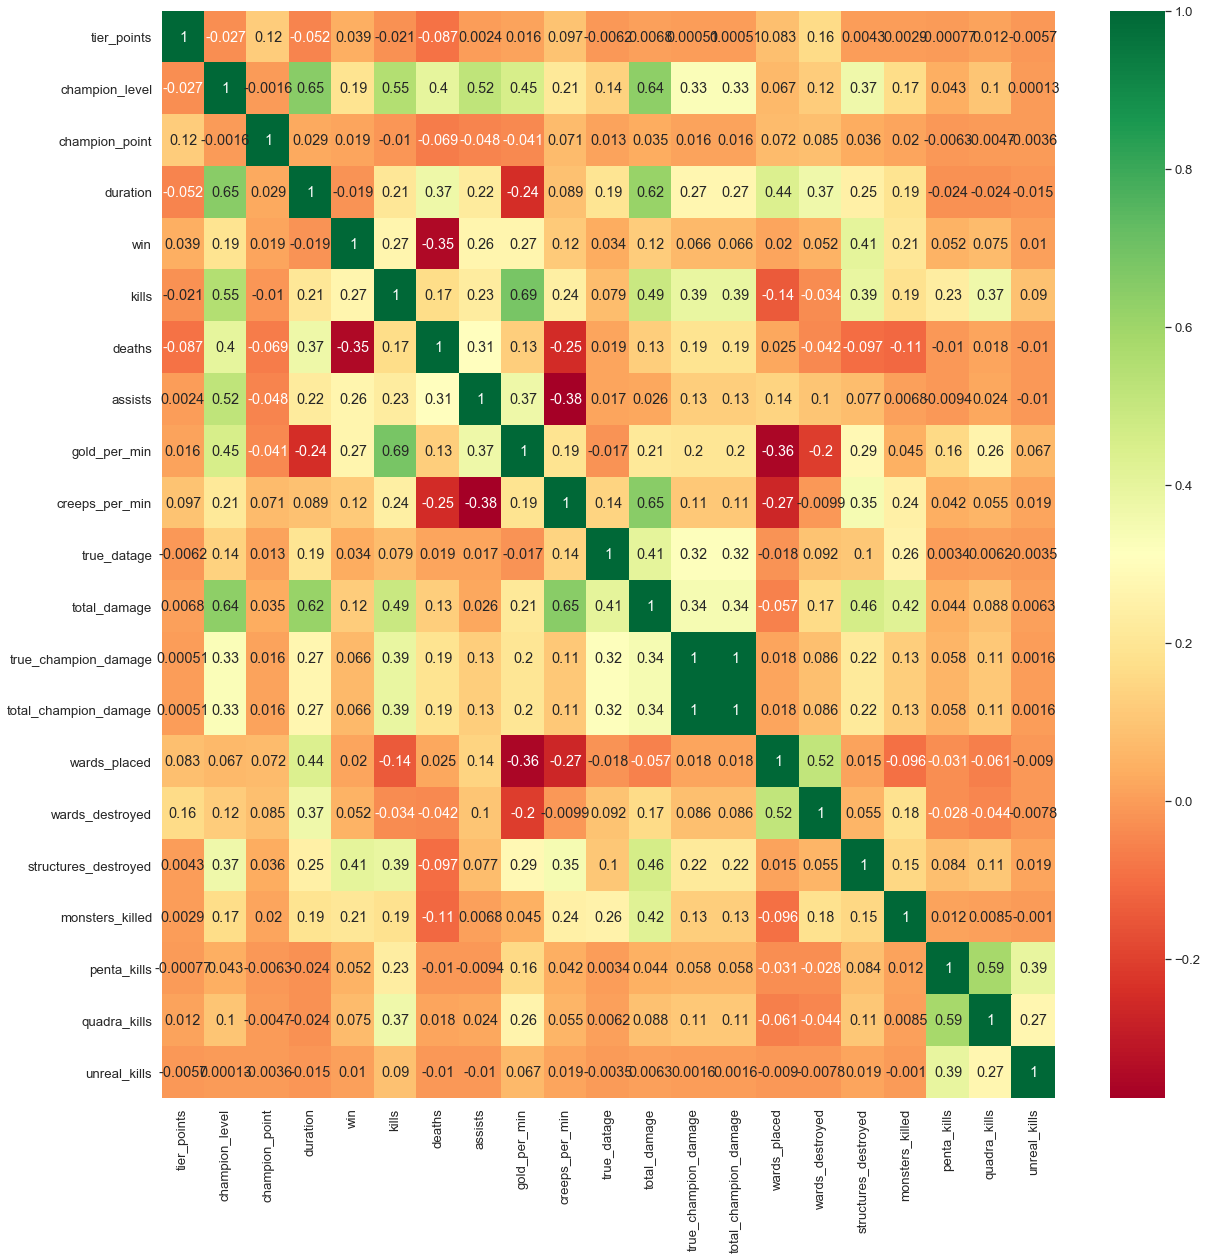

In [6]:
#Heatmap for co-relations
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
mapg=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
##changing the labels to binary
df["win"] = df["win"].astype(int)
df.head()

,username,tier,tier_points,champion,champion_level,champion_point,role,lane,duration,win,...,true_champion_damage,total_champion_damage,wards_placed,wards_destroyed,structures_destroyed,monsters_killed,penta_kills,quadra_kills,unreal_kills,timestamp
0,ryonoon,bronze,70,Kindred,18,80124.0,DUO,TOP,1391,1,...,2613,2613,0,0,4,0,0,0,0,1612412195033
1,ryonoon,bronze,70,Kindred,18,80124.0,DUO_SUPPORT,TOP,1483,1,...,4456,4456,0,0,2,0,0,0,0,1612410396516
2,ryonoon,bronze,70,Kindred,8,80124.0,NONE,JUNGLE,1227,0,...,151,151,6,1,0,1,0,0,0,1612408429557
3,ryonoon,bronze,70,Kindred,15,80124.0,NONE,JUNGLE,1998,0,...,2531,2531,9,1,2,4,0,0,0,1612406073526
4,ryonoon,bronze,70,Twitch,18,31945.0,SOLO,TOP,1571,1,...,25463,25463,0,0,3,0,0,1,0,1612341584966


In [8]:
#calculating Kills , deaths and assiste per minute
df["durationmin"]=(df["duration"]/60)
df["kills_min"]=(df["kills"]/df["durationmin"])
df["deaths_min"]=(df["deaths"]/df["durationmin"])
df["assists_min"]=(df["assists"]/df["durationmin"])


In [9]:
##list of all features in our dataset
for col in df.columns: 
    print(col) 

username
tier
tier_points
champion
champion_level
champion_point
role
lane
duration
win
kills
deaths
assists
gold_per_min
creeps_per_min
true_datage
total_damage
true_champion_damage
total_champion_damage
wards_placed
wards_destroyed
structures_destroyed
monsters_killed
penta_kills
quadra_kills
unreal_kills
timestamp
durationmin
kills_min
deaths_min
assists_min


In [39]:
##dropping redundant and irrelavant features
X = df.drop(['username','tier_points','role','true_datage','durationmin','lane','tier','champion','champion_point','kills','deaths','assists','duration','true_champion_damage','timestamp','total_champion_damage'], axis=1)
y = df.win
X

,champion_level,win,gold_per_min,creeps_per_min,total_damage,wards_placed,wards_destroyed,structures_destroyed,monsters_killed,penta_kills,quadra_kills,unreal_kills,kills_min,deaths_min,assists_min
0,18,1,807.434,4.44,133751,0,0,4,0,0,0,0,0.647017,0.301941,1.207764
1,18,1,719.595,2.23,86731,0,0,2,0,0,0,0,0.728254,0.404585,1.011463
2,8,0,247.873,3.72,57424,6,1,0,1,0,0,0,0.000000,0.195599,0.097800
3,15,0,413.574,4.86,170783,9,1,2,4,0,0,0,0.420420,0.150150,0.390390
4,18,1,761.820,3.44,132760,0,0,3,0,0,1,0,0.687460,0.572884,1.031190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19677,14,1,343.540,5.64,119799,5,4,2,0,0,0,0,0.068729,0.103093,0.137457
19678,15,0,368.657,5.45,114800,9,3,2,0,0,0,0,0.211144,0.105572,0.457478
19679,11,1,404.615,6.99,48363,5,0,1,0,0,0,0,0.192308,0.000000,0.128205
19680,15,0,430.659,6.45,129495,10,1,0,0,0,0,0,0.253776,0.072508,0.181269


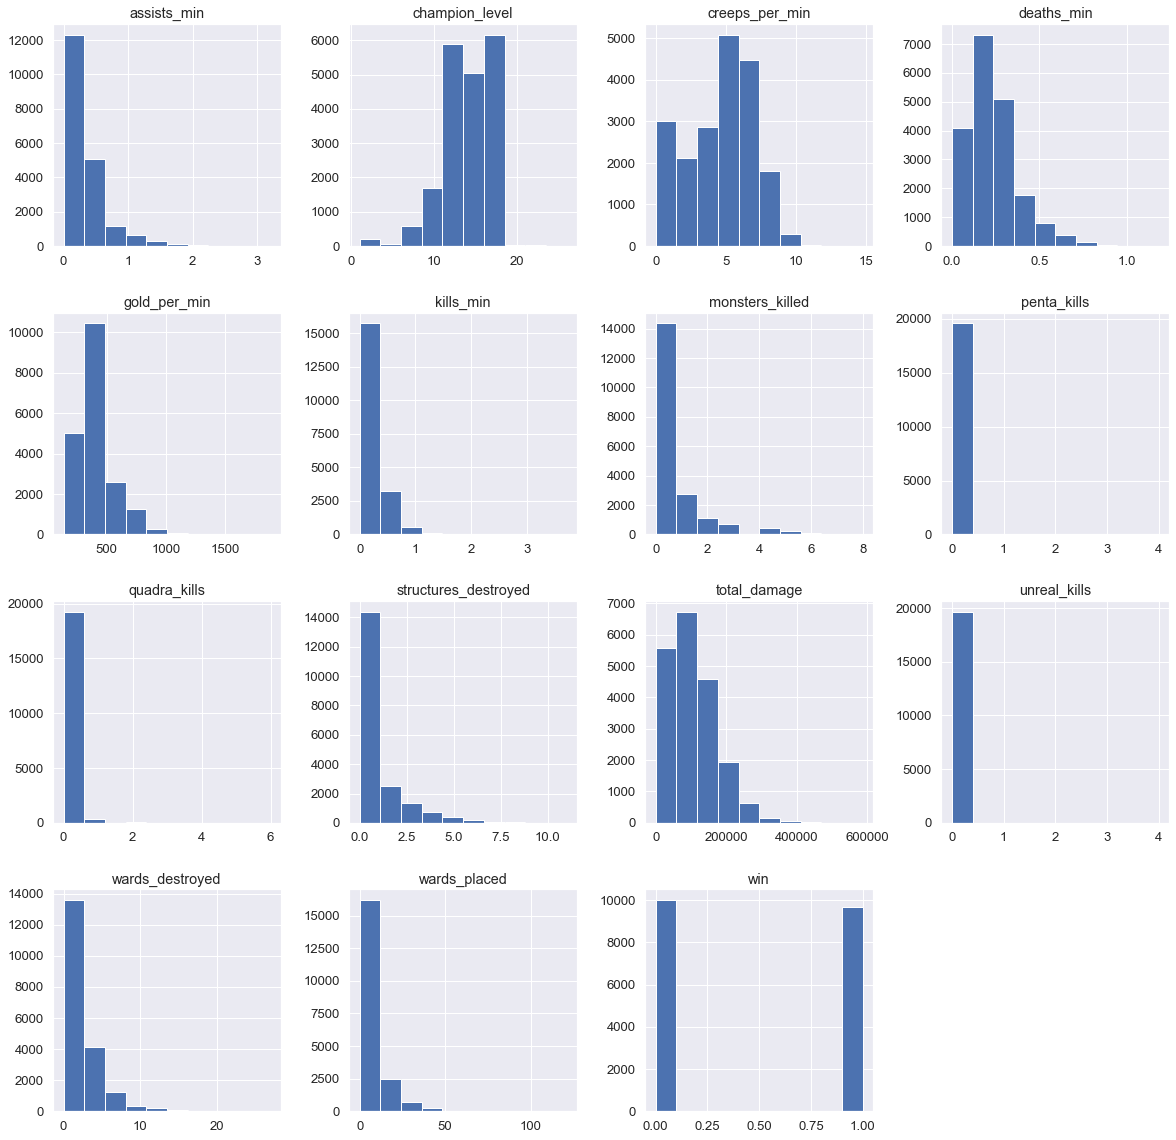

In [11]:
X.hist(figsize=(20,20),edgecolor='white')
plt.show()

In [40]:
print(y.shape)
bf=SelectKBest(score_func=chi2, k=10)
fit=bf.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

(19682,)
                   Specs         Score
4           total_damage  1.267124e+07
2           gold_per_min  7.878350e+04
1                    win  1.001400e+04
7   structures_destroyed  6.354716e+03
8        monsters_killed  1.956855e+03
0         champion_level  4.925472e+02
14           assists_min  3.797349e+02
12             kills_min  3.209326e+02
3         creeps_per_min  3.077177e+02
13            deaths_min  2.079290e+02


In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier

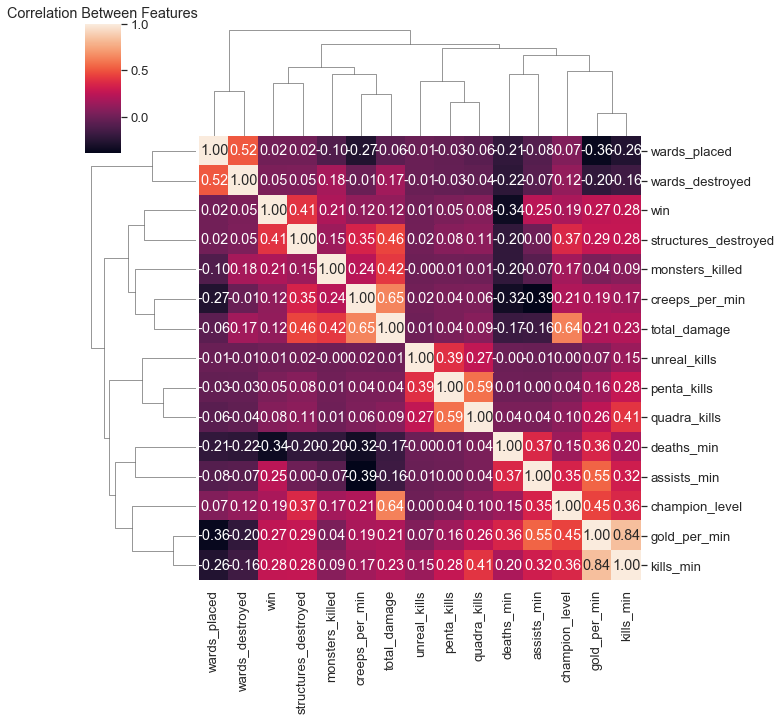

In [25]:
#pair plot
corr_matrix = X.corr()

sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

ValueError: The number of observations cannot be determined on an empty distance matrix.

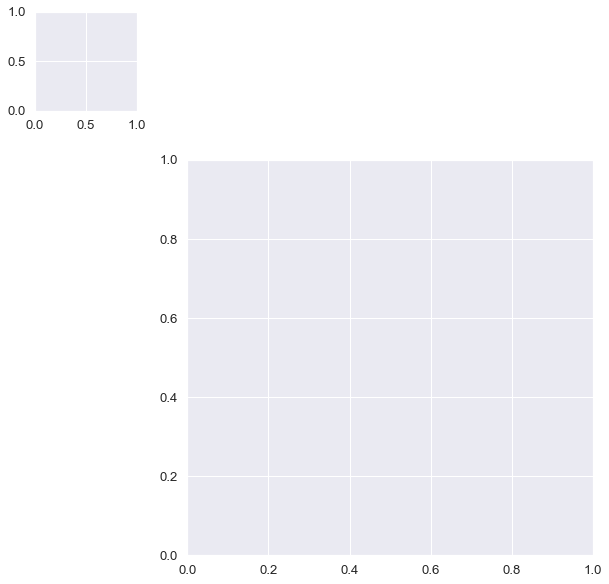

In [26]:
threshold = 0.75 
filtre = np.abs(corr_matrix["win"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(X[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

0    10014
1     9668
Name: win, dtype: int64


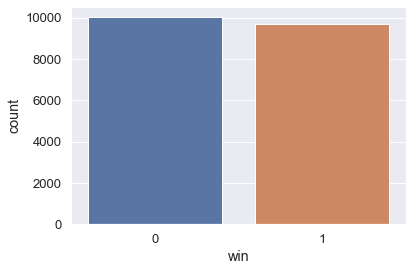

In [27]:
sns.countplot(X["win"])
print(X.win.value_counts())

In [28]:
#pair plot
sns.pairplot(X[corr_features], diag_kind = "kde", markers = "+", hue = "win")
plt.show()

IndexError: index -1 is out of bounds for axis 0 with size 0

<Figure size 0x0 with 0 Axes>

NameError: name 'test_size' is not defined

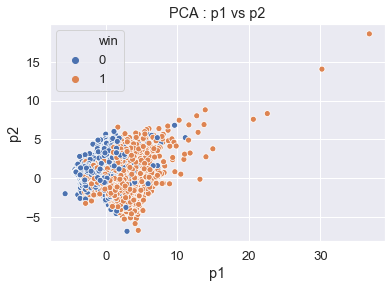

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

pca = PCA(n_components = 2) 
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["win"] = y
sns.scatterplot(x = "p1", y = "p2", hue = "win", data = pca_data)
plt.title("PCA : p1 vs p2")

X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = test_size, random_state = 42)

In [14]:
import numpy as np
import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart = np.histogram(df[~pd.isnull(df['deaths_min'])][['deaths_min']], bins=20)
# main statistics
stats = df['deaths_min'].describe().to_frame().T

In [15]:
#list of final features selected
for col in X.columns: 
    print(col) 

champion_level
win
gold_per_min
creeps_per_min
total_damage
wards_placed
wards_destroyed
structures_destroyed
monsters_killed
penta_kills
quadra_kills
unreal_kills
kills_min
deaths_min
assists_min


In [16]:
X.describe()


,champion_level,win,gold_per_min,creeps_per_min,total_damage,wards_placed,wards_destroyed,structures_destroyed,monsters_killed,penta_kills,quadra_kills,unreal_kills,kills_min,deaths_min,assists_min
count,19682.00000,19682.000000,19682.000000,19682.000000,19682.000000,19682.000000,19682.000000,19682.000000,19682.000000,19682.000000,19682.000000,19682.000000,19682.000000,19682.000000,19682.000000
mean,13.81633,0.491210,411.145418,4.646323,104591.169546,8.565644,2.086424,1.046337,0.541307,0.004827,0.024540,0.000356,0.242426,0.232974,0.335792
std,3.04143,0.499935,151.837376,2.336285,67529.652089,8.087084,2.667278,1.423555,1.129646,0.079549,0.188478,0.035639,0.228283,0.147696,0.319311
min,1.00000,0.000000,135.176000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.00000,0.000000,308.925000,2.790000,52535.250000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091796,0.133259,0.137300
50%,14.00000,0.000000,376.252000,5.010000,95071.500000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.186722,0.210960,0.253022
75%,16.00000,1.000000,464.916250,6.390000,144498.000000,11.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.325836,0.301921,0.410959
max,26.00000,1.000000,1883.512000,14.800000,587208.000000,121.000000,27.000000,11.000000,8.000000,4.000000,6.000000,4.000000,3.707317,1.182796,3.206107


In [18]:
#performing the train and test split
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_train.shape

NameError: name 'y' is not defined

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15745 entries, 10488 to 16921
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   champion_level        15745 non-null  int64  
 1   gold_per_min          15745 non-null  float64
 2   creeps_per_min        15745 non-null  float64
 3   total_damage          15745 non-null  int64  
 4   wards_placed          15745 non-null  int64  
 5   wards_destroyed       15745 non-null  int64  
 6   structures_destroyed  15745 non-null  int64  
 7   monsters_killed       15745 non-null  int64  
 8   penta_kills           15745 non-null  int64  
 9   quadra_kills          15745 non-null  int64  
 10  unreal_kills          15745 non-null  int64  
 11  kills_min             15745 non-null  float64
 12  deaths_min            15745 non-null  float64
 13  assists_min           15745 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 1.8 MB


In [13]:
#fitting the model
model = XGBClassifier()
model.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [14]:
y_pred = model.predict(X_test)

print('accuracy', model.score(X_test,y_test))
print(model.score)

accuracy 0.8326136652273305
<bound method ClassifierMixin.score of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>


In [15]:
##We gonna check the RMSE score for our XGB model 
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: %f" %(rmse))
import graphviz
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')


RMSE: 0.409129


In [16]:
#Defining Function for creating confusion matrix
def plot_cm(y_pred, y, model):
    cf_matrix = confusion_matrix(y, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title('{} Confusion Matrix'.format(model))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

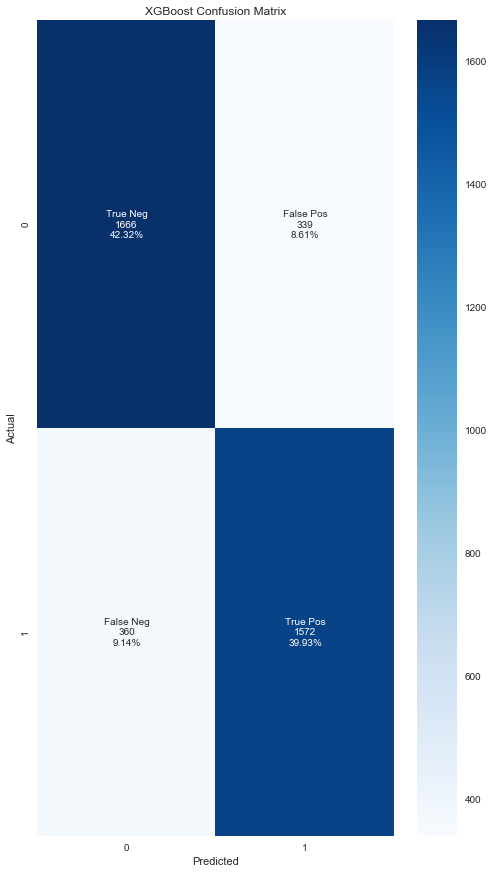

In [48]:
y_pred = cross_val_predict(model, X_test, y_test, cv=10)
plot_cm(cross_val_predict(model, X_test, y_test, cv=10), y_test, 'XGBoost')


In [19]:
#Decision Tree Classification
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, y_train)
print("score on test: " + str(bg.score(X_test, y_test)))
print("score on train: "+ str(bg.score(X_train, y_train)))
print('accuracy', bg.score(X_test,y_test))
print(bg.score)

score on test: 0.8034036068072136
score on train: 0.9354080660527151
accuracy 0.8034036068072136
<bound method ClassifierMixin.score of BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                 

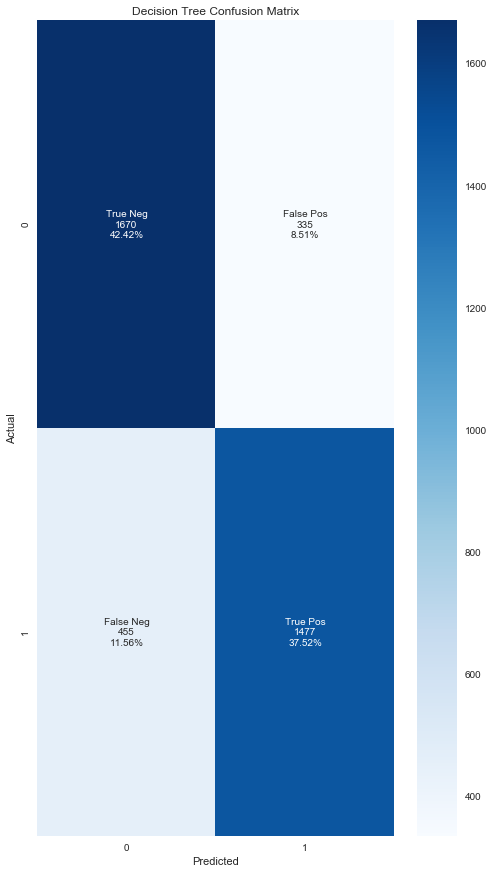

In [49]:
#visualising the confusion matrix
y_pred = cross_val_predict(bg, X_test, y_test, cv=10)
plot_cm(cross_val_predict(bg, X_test, y_test, cv=10), y_test, 'Decision Tree')

In [22]:
##with random forest
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
print("score on test: " + str(rf.score(X_test, y_test)))
print("score on train: "+ str(rf.score(X_train, y_train)))
print('accuracy', rf.score(X_test,y_test))
print(rf.score)

score on test: 0.8214376428752858
score on train: 0.8685296919657034
accuracy 0.8214376428752858
<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>


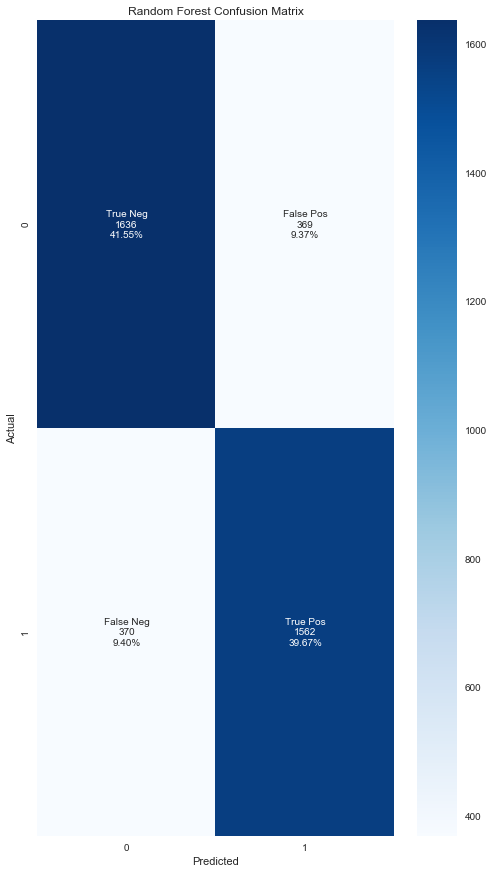

In [50]:
#visualising the random forest confusion matrix
y_pred = cross_val_predict(rf, X_test, y_test, cv=10)
plot_cm(cross_val_predict(rf, X_test, y_test, cv=10), y_test, 'Random Forest')

In [24]:
# predict probabilities for AUC (XGB)
pred_prob1 = model.predict_proba(X_test)
from sklearn.metrics import roc_curve

# roc curve for model
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [25]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

0.9115610301368732


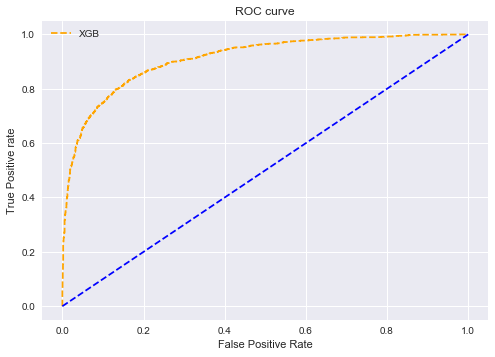

In [26]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XGB')
#plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=1000)
plt.show();

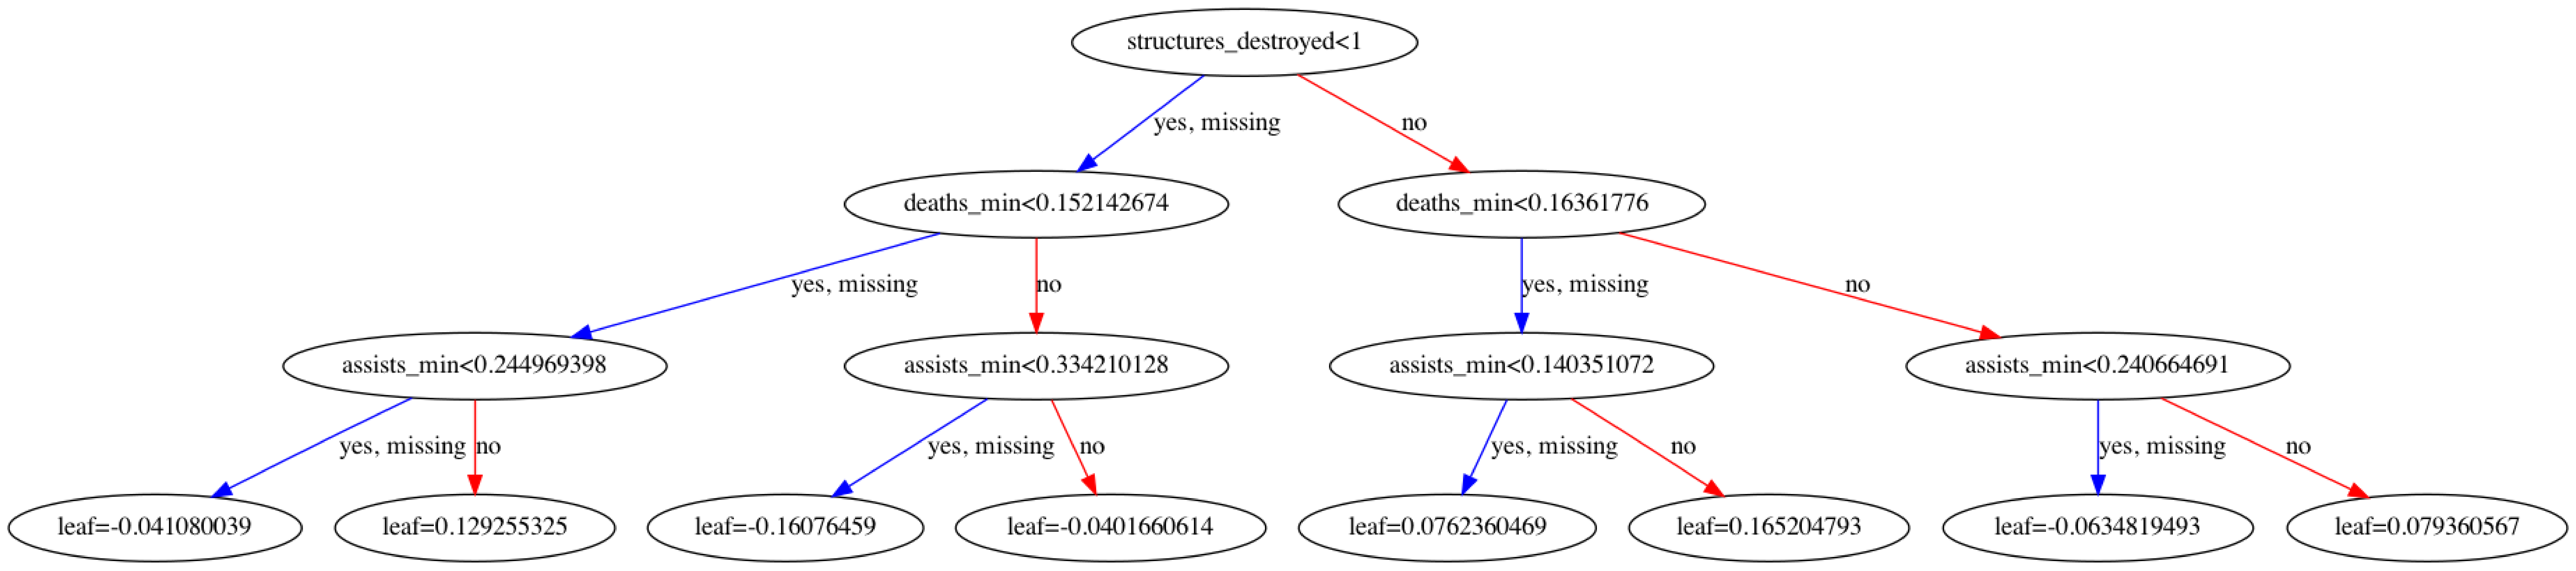

In [31]:
###visualising the tree

xgb.plot_tree(model,num_trees=0)
plt.rcParams['figure.figsize']=[200,400]
plt.show()

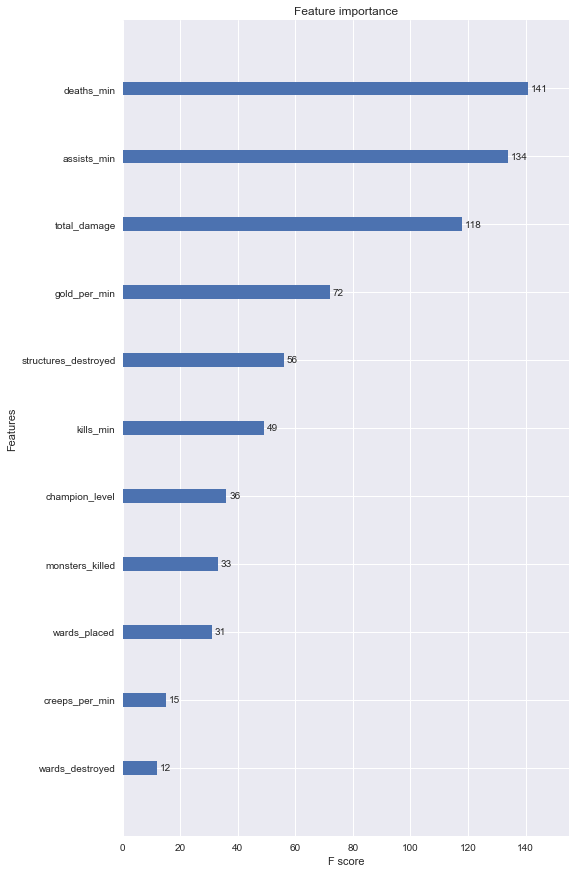

In [33]:
##importance of parameters
xgb.plot_importance(model)
plt.rcParams['figure.figsize']=[8,15]
plt.show()

In [35]:
#Tuning the parameters
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

    
}

In [36]:
classifier = xgboost.XGBClassifier()

In [37]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [38]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    9.1s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   11.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [39]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [41]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
y_pred = classifier.predict(X_test)



print('accuracy', classifier.score(X_test,y_test))

accuracy 0.8326136652273305


In [51]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X,y, cv=10)
score

array([0.80142204, 0.83900457, 0.85772358, 0.84146341, 0.83587398,
       0.83841463, 0.78810976, 0.83689024, 0.83434959, 0.81504065])